<a href="https://colab.research.google.com/github/Amityadav9/Sentiment-Analysis-Amazon-reviews-/blob/main/Sentiment_Analysis(Amazon_reviews)_Using_Keras_Embedding_Layer_in_TensorFlow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
    %tensorflow_version 2.x
except:    
    !pip install --upgrade tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Dataset

/content/drive/My Drive/Dataset


In [ ]:
!unzip amazonreviews.zip

Archive:  amazonreviews.zip
replace test.ft.txt.bz2? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.ft.txt.bz2         
replace train.ft.txt.bz2? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.ft.txt.bz2        y
y



# New Section

In [ ]:
!bzip2 -d train.ft.txt.bz2

bzip2: Output file train.ft.txt already exists.


In [ ]:
with open('train.ft.txt', 'r') as file:
    lines = file.readlines()

In [ ]:
lines

In [ ]:
print(len(lines))

3600000


In [ ]:
import pandas as pd
DF_text_data = pd.DataFrame()

In [ ]:
texts=[]
labels=[]

for line in lines:
    line = line.split()
    labels.append(1) if line[0] =="__label__2" else labels.append(0)
    texts.append(" ".join(line[1:]))

DF_text_data['reviews'] = texts
DF_text_data['labels'] = labels

In [ ]:
DF_text_data.head()

,reviews,labels
0,Stuning even for the non-gamer: This sound tra...,1
1,The best soundtrack ever to anything.: I'm rea...,1
2,Amazing!: This soundtrack is my favorite music...,1
3,Excellent Soundtrack: I truly like this soundt...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1


In [ ]:
from sklearn import model_selection
_, X_data,_, y_data = \
    model_selection.train_test_split(DF_text_data['reviews'], 
                                     DF_text_data['labels'], test_size=0.02)

In [ ]:
def preprocess(in_text):
   
    # If we have html tags, remove them by this way:
   # out_text = remove_tags(in_text)
   
    # Remove punctuations and numbers
    out_text = re.sub('[^a-zA-Z]', ' ', in_text)
   
    # Convert upper case to lower case
    out_text="".join(list(map(lambda x:x.lower(),out_text)))
   
    # Remove single character
    out_text = re.sub(r"\s+[a-zA-Z]\s+", ' ', out_text)
    return out_text

In [ ]:
#Performing preprocessing
import re

text_data = []
for review in list(X_data): 
  text_data.append(preprocess(review))

In [ ]:
#text_data

In [ ]:
DF_text = pd.DataFrame()
DF_text ['reviews'] = text_data
DF_text ['labels'] = list(y_data)

In [ ]:
DF_text.head()

,reviews,labels
0,great sound great sound the automatic speake...,1
1,repetitive and boring in this game you are re...,0
2,from romantic to raucous after read lot of...,1
3,for rats for hell of living dead first of...,1
4,not describe well received this necklace and i...,0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'\nIf you use Anaconda with PyCharm uncomment these lines to show the figure.\n'

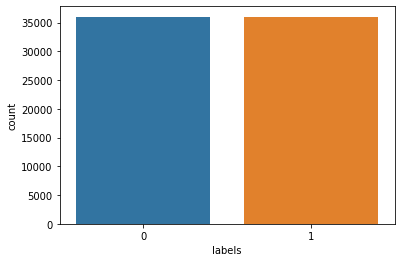

In [ ]:
#Plot data distribution

import seaborn as sns
sns.countplot(x='labels', data=DF_text)

"""
If you use Anaconda with PyCharm uncomment these lines to show the figure.
"""

#import matplot.pyplot as as plt
#plt.show()

In [ ]:
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(DF_text['reviews'], 
                                     DF_text['labels'], test_size=0.30)


In [ ]:
#Convert them to the list array.

In [ ]:
import numpy as np

X_train = np.array(X_train.to_list())
X_test = np.array(X_test.to_list())

y_train = np.array(y_train.to_list())
y_test = np.array(y_test.to_list())

In [ ]:
from keras_preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
vocab_size = len(word_index)+1
print(vocab_size)

77330


In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

max_len = 100

X_train_pad = pad_sequences(X_train,padding ='post', maxlen = max_len)
X_test_pad = pad_sequences(X_test,padding= 'post', maxlen = max_len)

In [ ]:
# input_dim: Size of the vocabulary in the text data.
# output_dim: Size of the vector space in which words will be embedded. This is a parameter that can be experimented for having a better performance. (ex: 32, 100, …)
# input_length: Length of input sequences

In [ ]:

from tensorflow.keras.layers import Dense,LSTM,Embedding,Bidirectional
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size,32))
#model.add(Bidirectional(LSTM(32,return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
#for units in [32,32]:
 #model.add(Dense(units, activation = 'relu'))
model.add(Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2)) 
model.add(Dense(1,activation ='sigmoid'))

In [ ]:
import tensorflow as tf
model.compile(optimizer='adam',
            loss= tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 32)          2474560   
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 64)                16640     
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 33        
Total params: 2,493,313
Trainable params: 2,493,313
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_pad,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(X_test_pad,y_test))

Epoch 1/10
394/394 [==============================] - 14s 36ms/step - loss: 0.5655 - accuracy: 0.8617 - val_loss: 0.5627 - val_accuracy: 0.8658
Epoch 2/10
394/394 [==============================] - 14s 35ms/step - loss: 0.5462 - accuracy: 0.9050 - val_loss: 0.5622 - val_accuracy: 0.8593
Epoch 3/10
394/394 [==============================] - 13s 34ms/step - loss: 0.5375 - accuracy: 0.9247 - val_loss: 0.5599 - val_accuracy: 0.8757
Epoch 4/10
394/394 [==============================] - 13s 33ms/step - loss: 0.5336 - accuracy: 0.9335 - val_loss: 0.5619 - val_accuracy: 0.8785
Epoch 5/10
394/394 [==============================] - 13s 34ms/step - loss: 0.5292 - accuracy: 0.9434 - val_loss: 0.5604 - val_accuracy: 0.8806
Epoch 6/10
394/394 [==============================] - 13s 34ms/step - loss: 0.5267 - accuracy: 0.9487 - val_loss: 0.5600 - val_accuracy: 0.8707
Epoch 7/10
394/394 [==============================] - 13s 34ms/step - loss: 0.5251 - accuracy: 0.9524 - val_loss: 0.5597 - val_accuracy:

In [ ]:
model.save('/tmp/Amazon_Reviews_sentiment_analysis.hdf5')

In [ ]:
def pad_to_size(vec, size):
  zeros = [0]* (size - len(vec))
  vec.extend(zeros)
  return vec

In [ ]:
from keras_preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer = tfds.features.text.Tokenizer()

def predict_fn(pred_text):
  encoded_pred_text = tokenizer(pred_text)
  print(encoded_pred_text)
  encoded_pred_text = pad_to_size(encoded_pred_text, 32)
  print(encoded_pred_text )
  encoded_pred_text = tf.cast(encoded_pred_text, tf.float32)
  predictions = sa_load.predict(tf.expand_dims(encoded_pred_text ,0))

  return (predictions)

In [ ]:
import tensorflow_datasets as tfds
encoder = tfds.features.text.TokenTextEncoder(word_index)

In [ ]:
#print(word_index)

In [ ]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [ ]:
pred_text = ('This watch is pretty bad. Color and dial looks pathetic.')
predictions = predict_fn(pred_text)
print(predictions)

TypeError: ignored